# Aproximace funkcí I

Naimportujeme si knihovny potřebné pro následující příklady:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Typy aproximací:
* Interpolační  
* Čebyševovy
* Aproximace metodou nejmenších čtverců

## Interpolační aproximace

* Máme zadané diskrétní funkční hodnoty nějaké funkce $f(x)$ v bodech $x_{0},\dots ,x_{n}$.
* Hledáme interpolační funkci, která má v zadaných bodech $x_{0},\dots ,x_{n}$ stejné hodnoty jako funkce $f(x)$.
 * Globální interpolace
   * V celém intervalu jsou koeficienty interpolační funkce stejné
   * Např. Lagrangeův, Newtonův interpolační polynom
 * Lokální interpolace
   * V každém podintervalu má interpolační funkce různé koeficienty
   * Např. spline

### Lagrangeův interpolační polynom (globální interpolace )
* [Konstrukce Lagrangeova interpolačního polynomu](http://pascal.fjfi.cvut.cz/~vachal/edu/nme/cviceni/03_aprox/DOCS/priklad_Lagrangeova_interpolace.pdf) řádu $n$:
  * Známe $n+1$  bodů $x_{0},\dots ,x_{n}$  a jim odpovídající funkční hodnoty $f(x_{0}),\dots ,f(x_{n})$ 
$$
L_{n}(x)=\sum_{i=0}^{n}y_{i}F_{i}(x),
$$
přičemž $L_{n}(x_{0})=y_{0},\dots,L_{n}(x_{n})=y_{n},$
$$
F_{i}(x) = \dfrac{x-x_{0}}{x_{i}-x_{0}}\dots\dfrac{x-x_{i-1}}{x_{i}-x_{i-1}}\dfrac{x-x_{i+1}}{x_{i}-x_{i+1}}\dots\dfrac{x-x_{n}}{x_{i}-x_{n}}=\prod_{j = 0,j \neq i}^{n}\dfrac{x-x_{j}}{x_{i}-x_{j}}
$$

<div class="alert alert-block alert-warning"><b>Cvičení 05.01: </b> Naprogramujte výpočet Lagrangeovy interpolace v libovolném bodě pro $x=\{-4, -1, 0, 2\}$ a $f(x)=\{-28, -16, -36, -40\}$.</div>

In [2]:
#
bod = -0.5
x = np.array([-4, -1, 0, 2])
y = np.array([-28, -16, -36, -40])
pocet_bodu = np.size(x) # stupen polynomu je pocet_bodu - 1
L = 0 # Lagrangeuv polynom

for i in range(pocet_bodu): # pocet scitancu v sume = stejny jako pocet bodu
    F = 1
    for j in range(pocet_bodu):
        if j != i:
            F = F * (bod - x[j])/(x[i]-x[j])
    L = L + y[i]*F   

print(L)

-26.25


### Spline (lokální interpolace)

* Lokální interpolace
 * Celý interval je rozdělený na podintervaly
 * V každém podintervalu má interpolační funkce různé koeficienty
 
* Interpolační spline:
 * Prochází všemi uzly.
 * V uzlech má spojitou alespoň první derivaci.
 
* Kubický spline - [odvození](http://pascal.fjfi.cvut.cz/~vachal/edu/nme/cviceni/03_aprox/DOCS/teorie_kubicky_spline.pdf)

<div class="alert alert-block alert-warning"><b>Cvičení 05.02: </b> Můžete vyzkoušet <a href="http://pascal.fjfi.cvut.cz/~vachal/edu/nme/cviceni/03_aprox/MATLAB/kubspline.m" >skript</a> pro kubický spline a <a href="http://pascal.fjfi.cvut.cz/~vachal/edu/nme/cviceni/03_aprox/MATLAB/spline.dat">vstupní data</a> pro Matlab (dostupný též <a href="https://www.mathworks.com/products/matlab-online.html">online</a> pro studenty ČVUT).</div>

## Aproximace Čebyševovými polynomy

* Čebyševův polynom $T_{n}(x)$:
 * $T_{0}(x)=1$
 * $T_{1}(x)=x$
 * $T_{n+1}(x)=2xT_{n}(x)-T_{n-1}(x)$
* Pro interpolaci [Čebyševovými polynomy](https://en.wikipedia.org/wiki/Chebyshev_polynomials#/media/File:Chebyshev_Polynomials_of_the_First_Kind.svg) se libovolný interval lineárně transformuje na interval $\langle-1,1\rangle$.
* Každému $t \in \langle a,b\rangle$ přiřadíme hodnotu $x \in \langle-1,1\rangle$ předpisem $x = \left[2t-(a+b)\right]/(b-a)$.
* Funkci $f(x)$ aproximujeme:
$$
f(x)\approx T(x)=\dfrac{1}{2}c_{0}+\sum_{j=1}^{N-1}c_{j}T_{j}(x)
$$
$$
c_{j}=\dfrac{2}{N}\sum_{k=1}^{N}f\left[ \cos\left( \dfrac{\pi(k-0.5)}{N}\right) \right]\cos\left( \dfrac{\pi j(k-0.5)}{N}\right)
$$
* Hodnoty funkce $f(x)$ jsou rovny hodnotám funkce $T(x)$ ve všech $N$ kořenech (nulových bodech) polynomu $T_{n}(x)$.


<div class="alert alert-block alert-warning"><b>Cvičení 05.03: </b> Aproximujte funkci $f(x)=x^{4}\log(10+\lvert x \rvert)\cos(x)$ pomocí prvních 20 Čebyševových polynomů.</div>

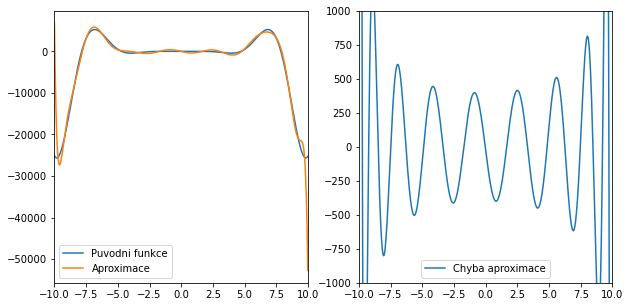

In [3]:
#
N = 20 # stupen aproximace (pocet Cebysevovych polynomu)
a = -10 # levy kraj intervalu
b = 10 # pravy kraj intervalu
def zadanafce(t):
    return  t**4 * np.log(10+np.abs(t)) * np.cos(t)
# t interval <a,b>
bodu = 1000 # pocet bodu, ze kterych chceme funkci aproximovat


# transformace intervalu z <a,b> do <-1,1>
def trans(t):
    return ( 2*t - (a+b) ) / (b-a)


def func(xx): # hodnota funkce pro xx transformovane z <a,b> na <-1,1>
    t = ( xx*(b-a) + (a+b) ) / 2 # "roztahneme" hodnoty z intervalu <-1,1> na <a,b>
    return zadanafce(t)#  aproximovana funkce

def c(j): # koeficienty cj (viz. prednaska)
    suma = 0
    for k in range(N):
        suma = suma + func(np.cos(np.pi/N*(k-0.5)) )  *  np.cos(np.pi/N*(k-0.5)*j )
    return 2*suma/N

#    rekurentni definice n Cebysevovych polynomu v bode xx
    
def T(xx): # Cebysevovy polynomy
    T0 = 1 
    T = np.zeros(N-1)    
    T[1] = xx
    T[2] = 2*xx*T[1] - T0
    for ii in range(3,N-2):
        T[ii] = 2*xx*T[ii-1] - T[ii-2]
    return T

cj = np.zeros((N-1))
c0 = c(0) 
for i in range(N-1):
    cj[i] = c(i)

krok = (b-a) / bodu
x = a

xarr = np.zeros(bodu)
yarr = np.zeros(bodu)

for i in range(bodu):
    Tj = T(trans(x)) # hodnoty Cebysevovych polynomu v bode x
    y = 0.5*c0*1 # c0 prvni scitanec v aproximovane funkci
    # dale potrebujeme pricist sumu polynomu
    # cj[j] - koeficient cj, tj. j-ty polynom v bode x
    for j in range(N-2):
        y = y + cj[j]*Tj[j]
    xarr[i] = x # ulozime aktualni x
    yarr[i] = y # a aktualni y
    x = x+krok # posuneme se na dalsi x

x1 = np.arange(a,b,krok)
y1= zadanafce(x1)

fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].plot(x1,y1,label='Puvodni funkce')
ax[0].plot(xarr,yarr,label='Aproximace')
ax[0].set_xlim(-10,10)
ax[0].legend()

ax[1].plot(x1,yarr-y1,label='Chyba aproximace')
ax[1].set_xlim(-10,10)
ax[1].set_ylim(-1000,1000)
ax[1].legend()

## Aproximace derivací konečnými diferencemi

* Na 2. cvičení jsme ukazovali jednoduchý vzorec pro aproximaci derivace z funkčních hodnot ve dvou blízkých bodech 
* Ukážeme si [příklad metody vyššího řádu](http://pascal.fjfi.cvut.cz/~vachal/edu/nme/cviceni/03_aprox/DOCS/priklad_aproximace_derivaci.pdf) pro přesnější aproximaci derivace.

<div class="alert alert-block alert-warning"><b>Cvičení 05.04: </b> Implementujte uvedenou metodu vyššího řádu v následujícím příkladu pro výpočet derivace (zadání stejné jako Cvičení 02.04).</div>

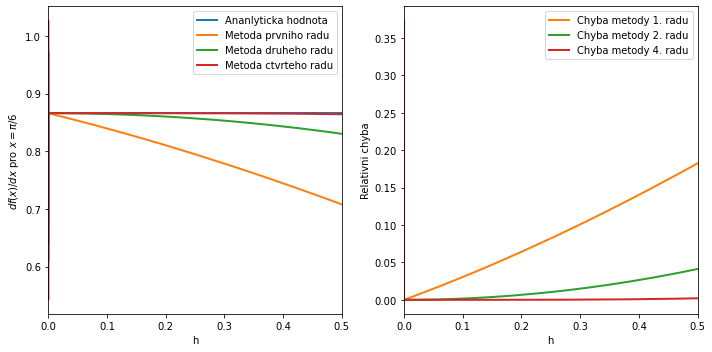

In [4]:
# kod

import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.sin(x)

def df(x):
    return np.cos(x)

def num1_df(x, h):
    return (f(x+h) - f(x))/h

def num2_df(x, h):
    return (f(x+h) - f(x-h))/(2*h)

def num4_df(x, h): # odhad derivace metodou ctvrteho radu
    return 1/(12*h) * ( f(x-2*h) - 8*f(x-h) + 8*f(x+h) - f(x+2*h) )

x = np.pi/6
h = x  # Pocatecni hodnota h

der_a = df(x) # Hodnota derivace analyticky
der_1 = num1_df(x,h) # Derivace metodou prvniho radu
der_2 = num2_df(x,h) # Derivace metodou druheho radu
der_4 = num4_df(x,h) # Derivace metodou ctvrteho radu
krok  = h # Seznam pouzitych velikosti kroku

# Hledame hodnoty derivace v bode x v zavislosti na kroku h
while h > np.finfo(float).eps:
    der_a = np.append(der_a, df(x))
    der_1 = np.append(der_1, num1_df(x,h))
    der_2 = np.append(der_2 ,num2_df(x,h))
    der_4 = np.append(der_4 ,num4_df(x,h))
    krok  = np.append(krok, h)
    h = 0.9 * h

fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].plot(krok,der_a,linewidth=2,label='Ananlyticka hodnota')
ax[0].plot(krok,der_1,linewidth=2,label='Metoda prvniho radu')
ax[0].plot(krok,der_2,linewidth=2,label='Metoda druheho radu')
ax[0].plot(krok,der_4,linewidth=2,label='Metoda ctvrteho radu')
ax[0].set_xlabel('h')
ax[0].set_ylabel(r'$df(x)/dx$ pro $x=\pi/6$')
ax[0].set_xlim((0,0.5))
#ax[0].set_xscale('log')
ax[0].legend()

ax[1].plot(krok, np.abs((der_1-der_a)/der_a),c='C1',linewidth=2,label='Chyba metody 1. radu')
ax[1].plot(krok, np.abs((der_2-der_a)/der_a),color='C2',linewidth=2,label='Chyba metody 2. radu')
ax[1].plot(krok, np.abs((der_4-der_a)/der_a),color='C3',linewidth=2,label='Chyba metody 4. radu')
ax[1].set_xlabel('h')
ax[1].set_ylabel('Relativni chyba')
ax[1].set_xlim((0,0.5))
ax[1].legend()

fig.tight_layout()